### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Importing Data

In [ ]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("C:/Users/vsdsd/Downloads/SkincancerISICTheInternationalSkinImagingCollaboration/Train")
data_dir_test = pathlib.Path('C:/Users/vsdsd/Downloads\SkincancerISICTheInternationalSkinImagingCollaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


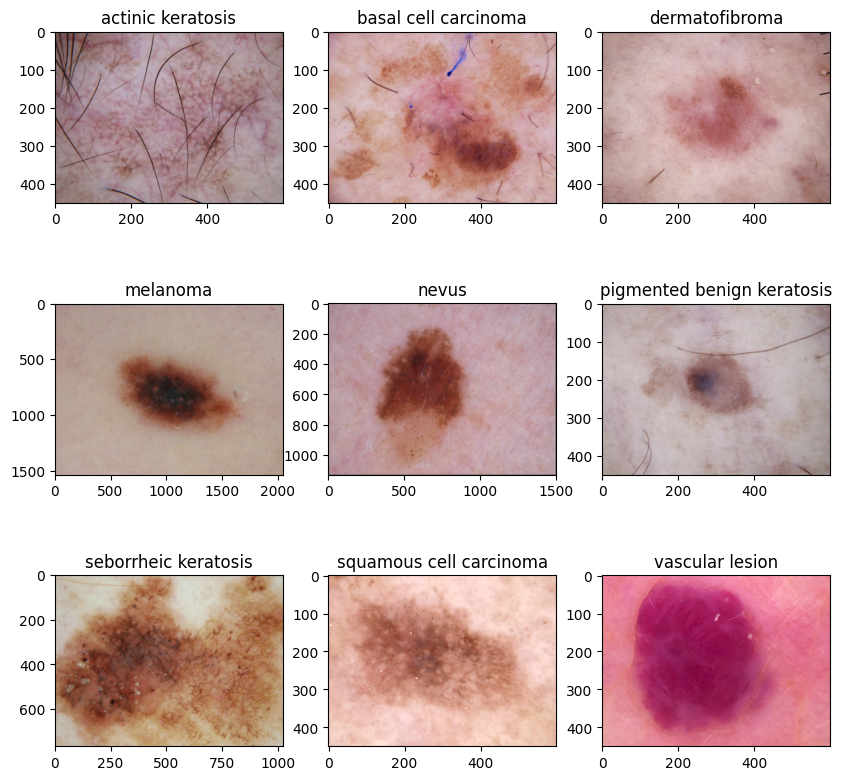

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Train the model

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
56/56 [==============================] - 114s 2s/step - loss: 2.0641 - accuracy: 0.1925 - val_loss: 2.0393 - val_accuracy: 0.2058
Epoch 2/10
56/56 [==============================] - 108s 2s/step - loss: 1.9949 - accuracy: 0.2221 - val_loss: 2.0223 - val_accuracy: 0.1812
Epoch 3/10
56/56 [==============================] - 114s 2s/step - loss: 1.7293 - accuracy: 0.3644 - val_loss: 1.6017 - val_accuracy: 0.4631
Epoch 4/10
56/56 [==============================] - 105s 2s/step - loss: 1.5914 - accuracy: 0.4342 - val_loss: 1.5391 - val_accuracy: 0.4564
Epoch 5/10
56/56 [==============================] - 108s 2s/step - loss: 1.5129 - accuracy: 0.4704 - val_loss: 1.5023 - val_accuracy: 0.4676
Epoch 6/10
56/56 [==============================] - 107s 2s/step - loss: 1.4690 - accuracy: 0.4721 - val_loss: 1.4345 - val_accuracy: 0.4765
Epoch 7/10
56/56 [==============================] - 103s 2s/step - loss: 1.4213 - accuracy: 0.5084 - val_loss: 1.7154 - val_accuracy: 0.4273
Epoch 8/10
56

### Visualizing training results

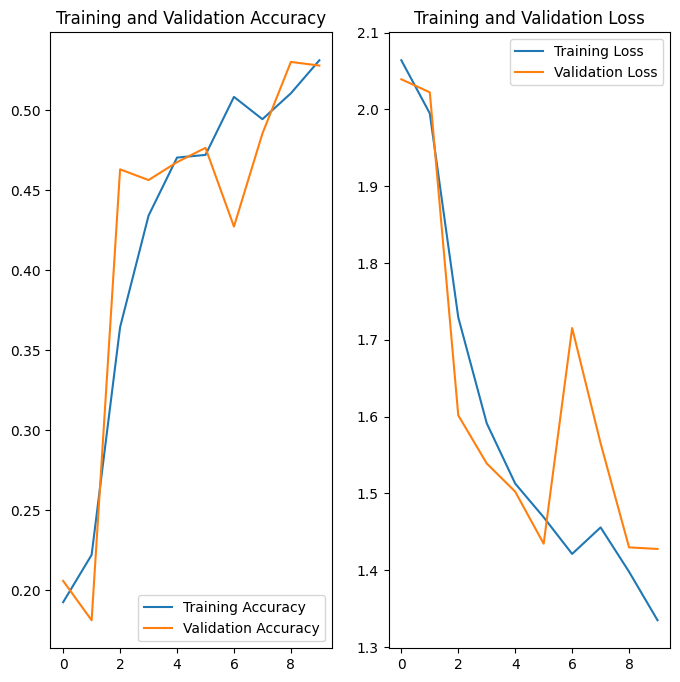

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

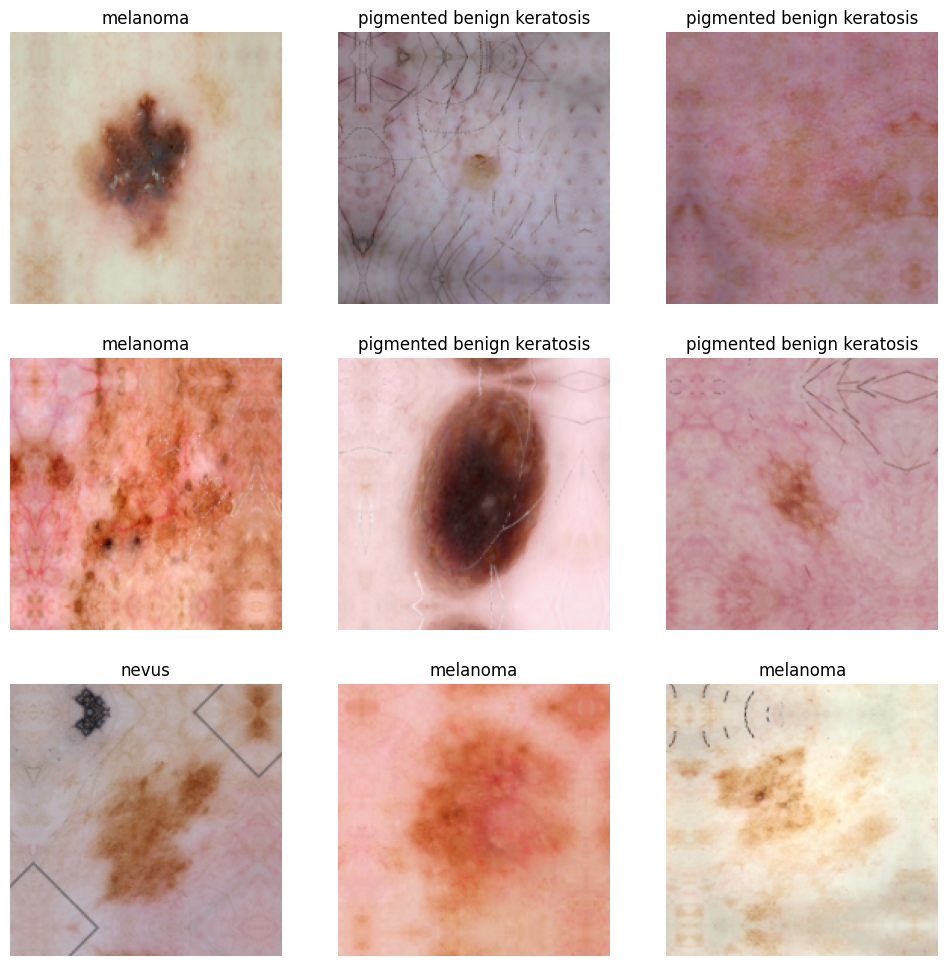

In [ ]:
# visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Model Creation, compilation and training the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 100 epochs
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
56/56 [==============================] - 111s 2s/step - loss: 2.0662 - accuracy: 0.1998 - val_loss: 2.0340 - val_accuracy: 0.2058
Epoch 2/10
56/56 [==============================] - 107s 2s/step - loss: 1.9994 - accuracy: 0.2310 - val_loss: 2.0298 - val_accuracy: 0.2975
Epoch 3/10
56/56 [==============================] - 108s 2s/step - loss: 2.0325 - accuracy: 0.2288 - val_loss: 2.0332 - val_accuracy: 0.2394
Epoch 4/10
56/56 [==============================] - 106s 2s/step - loss: 1.9733 - accuracy: 0.2578 - val_loss: 1.9141 - val_accuracy: 0.2215
Epoch 5/10
56/56 [==============================] - 109s 2s/step - loss: 1.9146 - accuracy: 0.2740 - val_loss: 1.8738 - val_accuracy: 0.3244
Epoch 6/10
56/56 [==============================] - 103s 2s/step - loss: 1.8332 - accuracy: 0.3209 - val_loss: 1.7936 - val_accuracy: 0.3400
Epoch 7/10
56/56 [==============================] - 105s 2s/step - loss: 1.7596 - accuracy: 0.3443 - val_loss: 1.6232 - val_accuracy: 0.4004
Epoch 8/10
56

### Visualizing the results

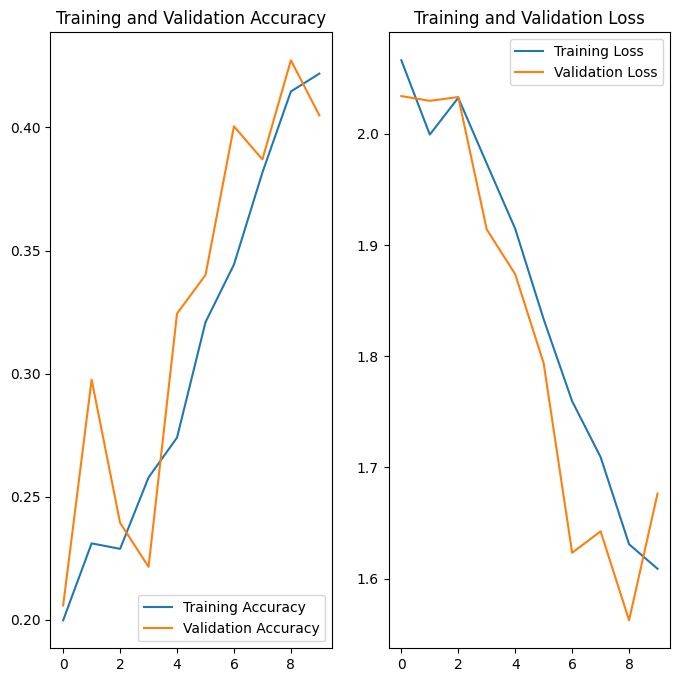

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,actinic keratosis
1,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,actinic keratosis
2,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,actinic keratosis
3,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,actinic keratosis
4,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,actinic keratosis
...,...,...
2234,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,vascular lesion
2235,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,vascular lesion
2236,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,vascular lesion
2237,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,vascular lesion


In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,actinic keratosis
1,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,actinic keratosis
2,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,actinic keratosis
3,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,actinic keratosis
4,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,actinic keratosis
...,...,...
2234,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,vascular lesion
2235,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,vascular lesion
2236,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,vascular lesion
2237,C:\Users\vsdsd\Downloads\SkincancerISICTheInte...,vascular lesion


<BarContainer object of 9 artists>

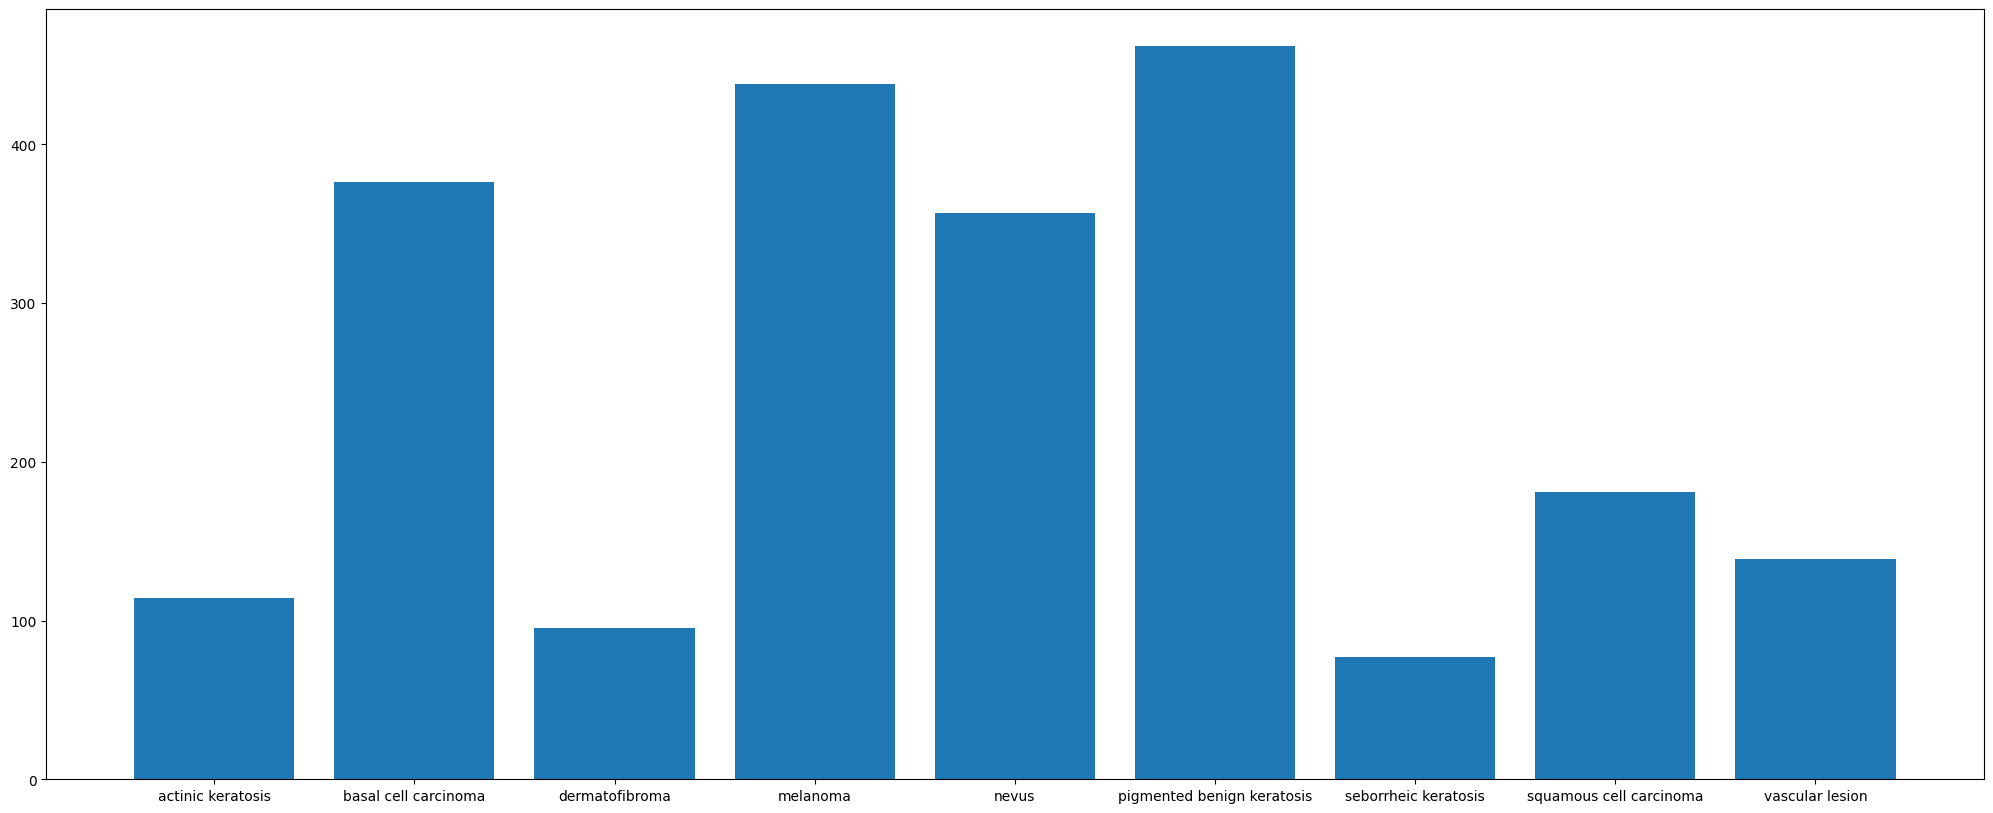

In [ ]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### Visualize the model results

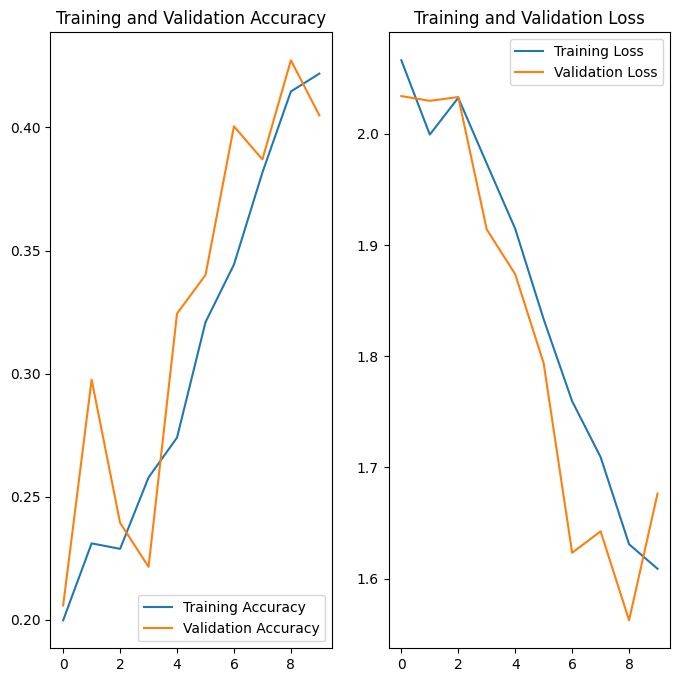

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()